# Credit Card Fraud Detection Using Supervised Machine Learning

## Project Description

The aim of this final project of Supervised Machine Learning Course is to implement a project that contains a development of a pre-trained supervised machine learning model, classifying financial transactions processed by credit cards based on collected and pre-processed dataset. There will be two main outcomes of this pre-trained supervised machine learning model, a fraud transaction and legit transaction. Nowadays, most of the credit cards generate enormous amounts of data, containing financial transactions processed by credit card holders. First, this project will clean, process, analyze the input dataset within Exploratory Data Analysis (EDA) Section outlined below. Also, this project will include data visualization with six scatterplots as part of EDA to visualize the relationships among different features or factors from this dataset. Furthermore, this project will technically encompass at least one of the classification algorithms to build supervised machine learning models, such as Support Vector Machine and Logistic Regression Algorithms. Finally, this project will evaluate the accuracy of pre-trained supervised machine learning models by using their assigned model accuracy metrics, classification reports, as well as confusion matrices. Therefore, this project will solve the issue of credit card fraud detection by utilizing the input dataset to build pre-trained supervised machine learning models for enhancing decision-making process of credit card fraud detection.

## Installing Project Modules

In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Libraries/Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Collection and Pre-Processing

In [3]:
creditCardData = pd.read_csv("./data/application_data.csv")
creditCardData.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preparation

In [4]:
creditCardData = creditCardData.dropna()
string_columns = creditCardData.select_dtypes(include=['object']).columns
creditCardData = creditCardData.drop(columns=string_columns, axis=1)
creditCardData.head(20)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,0,76500.0,545040.0,20677.5,450000.0,0.031329,-20348,-7115,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,0,315000.0,90000.0,4504.5,90000.0,0.022800,-10935,-422,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
316,100363,0,1,360000.0,493497.0,48942.0,454500.0,0.006629,-14882,-436,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
323,100371,0,1,450000.0,808650.0,31464.0,675000.0,0.072508,-14768,-426,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
328,100376,0,0,360000.0,254700.0,20250.0,225000.0,0.018801,-18831,-1342,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Relationship between Credit and Annuity')

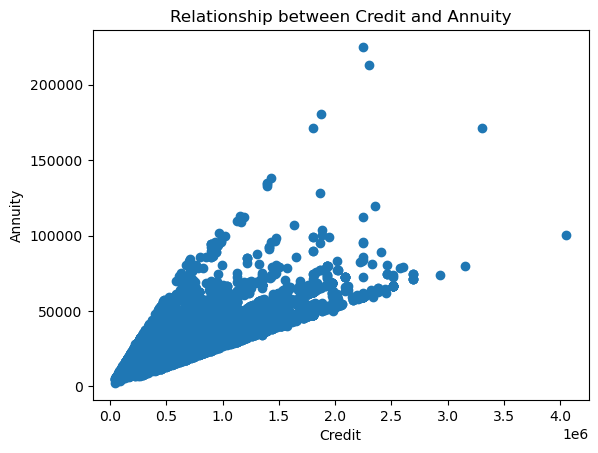

In [5]:
plt.scatter(np.array(creditCardData["AMT_CREDIT"]), np.array(creditCardData["AMT_ANNUITY"]))
plt.xlabel("Credit")
plt.ylabel("Annuity")
plt.title("Relationship between Credit and Annuity")

Text(0.5, 1.0, 'Relationship between Total Income and Credit')

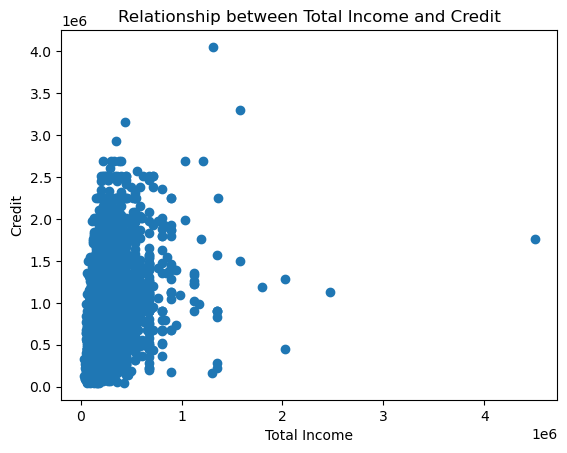

In [6]:
plt.scatter(np.array(creditCardData["AMT_INCOME_TOTAL"]), np.array(creditCardData["AMT_CREDIT"]))
plt.xlabel("Total Income")
plt.ylabel("Credit")
plt.title("Relationship between Total Income and Credit")

Text(0.5, 1.0, 'Relationship between Total Income and Annuity')

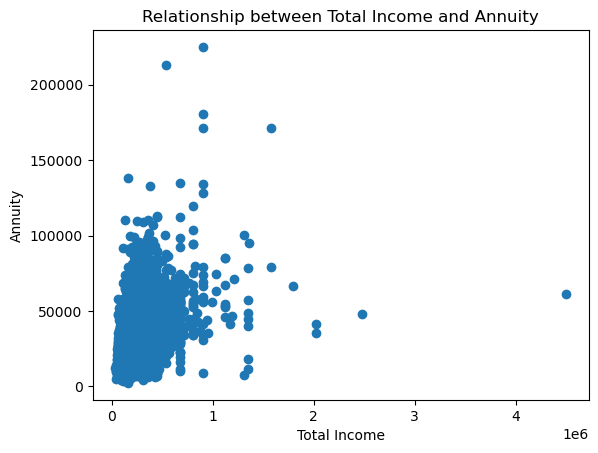

In [7]:
plt.scatter(np.array(creditCardData["AMT_INCOME_TOTAL"]), np.array(creditCardData["AMT_ANNUITY"]))
plt.xlabel("Total Income")
plt.ylabel("Annuity")
plt.title("Relationship between Total Income and Annuity")

Text(0.5, 1.0, 'Relationship between Total Income and Goods Price')

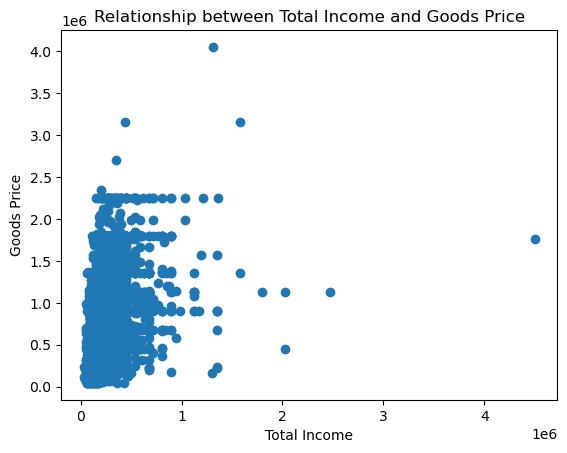

In [8]:
plt.scatter(np.array(creditCardData["AMT_INCOME_TOTAL"]), np.array(creditCardData["AMT_GOODS_PRICE"]))
plt.xlabel("Total Income")
plt.ylabel("Goods Price")
plt.title("Relationship between Total Income and Goods Price")

Text(0.5, 1.0, 'Relationship between Credit and Goods Price')

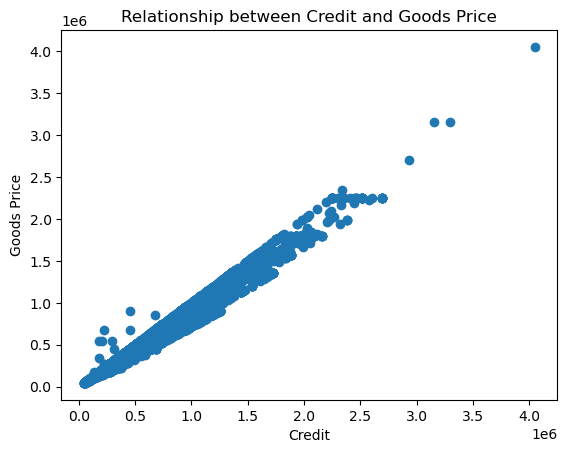

In [9]:
plt.scatter(np.array(creditCardData["AMT_CREDIT"]), np.array(creditCardData["AMT_GOODS_PRICE"]))
plt.xlabel("Credit")
plt.ylabel("Goods Price")
plt.title("Relationship between Credit and Goods Price")

Text(0.5, 1.0, 'Relationship between Annuity and Goods Price')

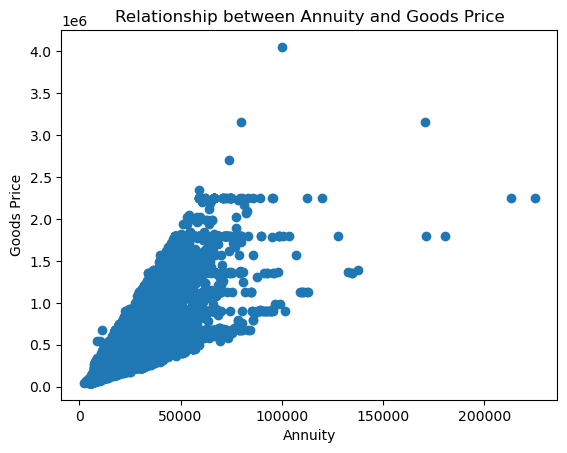

In [10]:
plt.scatter(np.array(creditCardData["AMT_ANNUITY"]), np.array(creditCardData["AMT_GOODS_PRICE"]))
plt.xlabel("Annuity")
plt.ylabel("Goods Price")
plt.title("Relationship between Annuity and Goods Price")

In [11]:
creditCardData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,-2299.091374,...,0.009998,0.000581,0.001046,0.000233,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,2077.178768,...,0.099493,0.024104,0.032331,0.015247,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,-3132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,-1680.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,-817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000


## Feature Engineering

In [12]:
X = np.array(creditCardData.drop("TARGET", axis=1))
y = np.array(creditCardData["TARGET"])

## Splitting Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choosing Model

In [14]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
lr_model = LogisticRegression(max_iter=200)

## Model Training

In [15]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
lr_model.fit(X_train, y_train)
y_pred2 = lr_model.predict(X_test)

/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.loca


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721



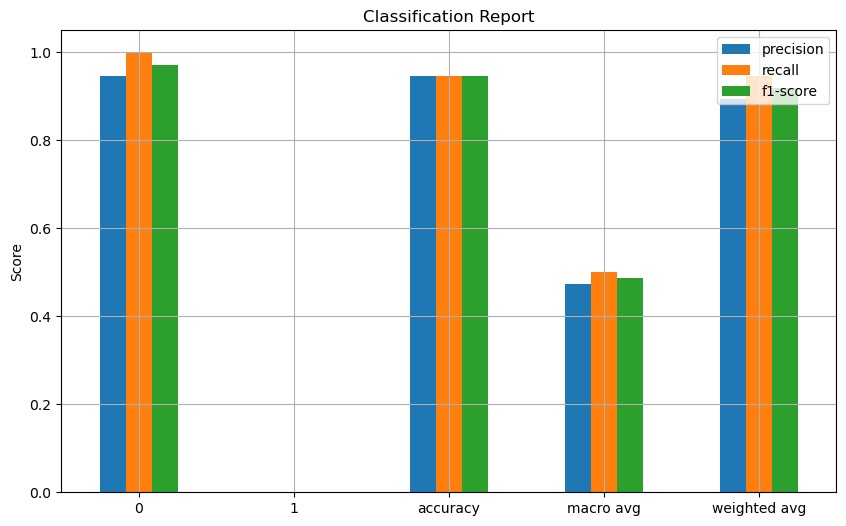


Confusion Matrix:
[[1627    0]
 [  94    0]]
True Negatives (TN): 1627
False Positives (FP): 0
False Negatives (FN): 94
True Positives (TP): 0


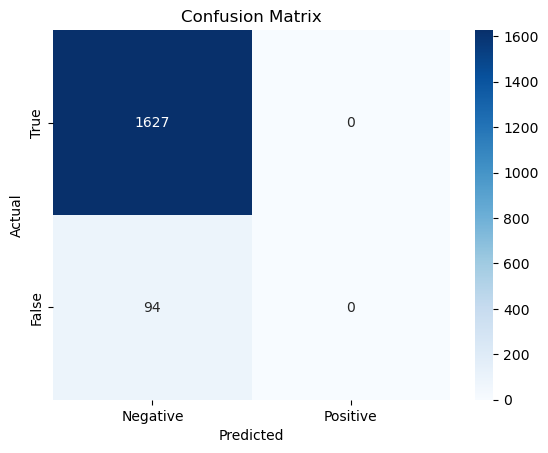

Accuracy: 0.9454

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721



/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nhindi7/.loca

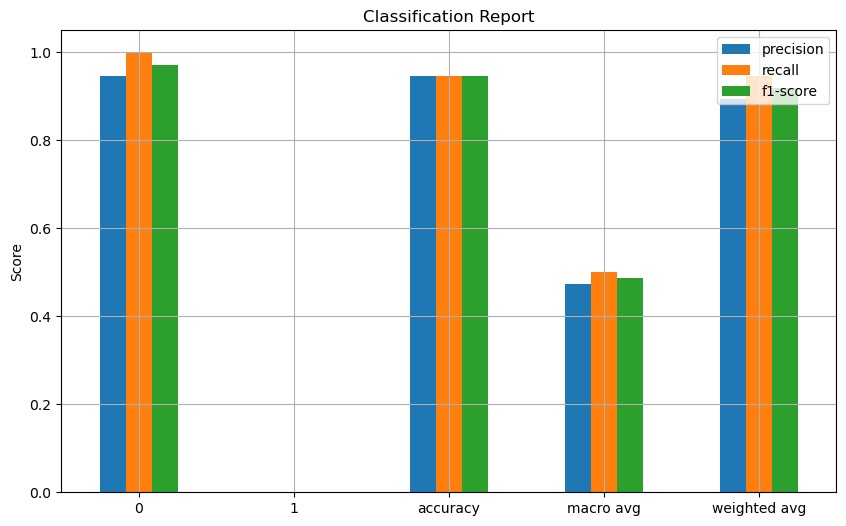


Confusion Matrix:
[[1627    0]
 [  94    0]]
True Negatives (TN): 1627
False Positives (FP): 0
False Negatives (FN): 94
True Positives (TP): 0


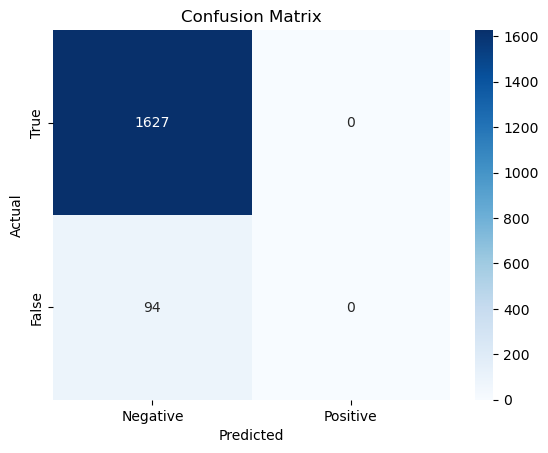

Accuracy: 0.9454


In [16]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

# Plotting
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid()
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'True Positives (TP): {TP}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

# Generate the classification report
report2 = classification_report(y_test, y_pred2, output_dict=True)

report2_df = pd.DataFrame(report2).transpose()

# Plotting
report2_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid()
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

cm2 = confusion_matrix(y_test, y_pred2)

# Extract TP, TN, FP, FN
TN2, FP2, FN2, TP2 = cm2.ravel()

print(f'True Negatives (TN): {TN2}')
print(f'False Positives (FP): {FP2}')
print(f'False Negatives (FN): {FN2}')
print(f'True Positives (TP): {TP2}')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy2:.4f}')

## Discussion

Based on the results generated above, it shows that these two pre-trained supervised machine learning models, which are in this case Support Vector Machine (SVM) and Logistic Regression, have generated high accuracy rates based on the produced classification reports and confusion matrices as indicated above. First, I've imported and installed a collection of libraries in Python relevant to this project, including scikit-learn, pandas, numpy, seaborn, and matplotlib. Next, I've collected and pre-processed a dataset of credit card transactions with a size of around 67MB from Kaggle Website. After that, I've cleaned the already processed dataset by removing all null or NaN values from this dataset. Also, I've excluded all object type columns from this dataset because they weren't essential in this project as I was working with only numeric or quantitative variables to examine statistical relationships. Furthermore, Exploratory Data Analysis (EDA) has been performed to analyze and visualize the given input dataset that contained information of financial transactions processed by customers' credit cards after cleaning and preparing the dataset itself. During the EDA, six scatterplots have been visualized for a variety of features or factors as predictor or independent variables to be fed into supervised machine learning models of SVM and Logistic Regression. The first scatterplot examined the correlation between credit and annuity, which represents a moderate linear relationship as shown in the given plot above. The second scatterplot exhibited the correlation between total income and credit, which represents a weak linear relationship as shown in the given plot above. The third scatterplot exhibited the correlation between total income and annuity, which represents a weak linear relationship as shown in the given plot above. The fourth scatterplot exhibited the correlation between total income and goods price, which represents a weak linear relationship as shown in the given plot above. The fifth scatterplot exhibited the correlation between credit and goods price, which represents a strong linear relationship as shown in the given plot above. The sixth scatterplot exhibited the correlation between annuity and goods price, which represents a moderate linear relationship as shown in the given plot above. At the end of EDA, I've summarized the cleaned and prepared dataset with statistically descriptive metrics, containing mean, median, standard deviation, maximum, minimum, as well as three quartiles (Q1, Q2, and Q3). Moreover, I've performed feature engineering, involving feature or factor selection before splitting dataset and building supervised machine learning models. While splitting the dataset, I've divided the dataset into two main parts, training and testing. Also, training dataset consisted of 80% of the whole dataset, but the remaining percentage of dataset has been consisted by testing dataset. As mentioned earlier, there were two supervised machine learning models have been trained and tested in this project, Support Vector Machine (SVM) and Logistic Regression. During this phase, these two models have been trained and tested to fit the predicted values from each model for predicting as many correct results as possible. At the end of this project, I've evaluated the two pretrained supervised machine learning models, SVM and Logistic Regression by including the following: Classification Reports, Confusion Matrices, and Accuracy Scores or Rates. As results have been yielded in this project, it was evident that both of these pre-trained supervised machine learning models have generated almost exact same accuracy rates based on their produced classification reports and confusion matrices. For example, both of these models have approximately resulted in an accuracy rate of 95%. The overall limitations of these pre-trained machine learning models were training and testing on an input dataset that wasn't large enough to maximize the models' performances based on their classification reports and confusion matrices.

## Conclusion

While this project exhibited the limitations of developing the selected pre-trained supervised machine learning models, this project generated quantifiable and measurable results demonstrating the performance of each selected pre-trained supervised machine learning model, which solved the problem of credit card fraud detection for all the financial institutions that issue these credit cards of their customers.